Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Objetivos
Los objetivos de hoy son:


1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
 * Tabla de contingencia


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

>
> `Enlace a la leyenda del Dataset:`
>
>  https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download
>

In [2]:
df = pd.read_csv('ds_salaries.csv', index_col = 0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# Elegimos hacer la tabla de contigencia de las variables job_title y salary
crosstab = pd.crosstab(df['job_title'], df['salary_in_usd'])
crosstab

salary_in_usd,2859,4000,5409,5679,5707,5882,6072,8000,9272,9466,...,276000,324000,325000,380000,405000,412000,416000,423000,450000,600000
job_title,,,,,,,,,,,,,,,,,,,,,
3D Computer Vision Researcher,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AI Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Analytics Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Applied Data Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Applied Machine Learning Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
BI Data Analyst,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Big Data Architect,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Big Data Engineer,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Business Data Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Como es muy larga la lista de salarios, vamos a cortarlos por intervalos.
# Para ello, añadimos al df una columna con los cortes por bins teniendo en cuenta el salario maximo y mínimo de nuestro conjunto

df['intervalos_salario'] = pd.cut(df['salary_in_usd'], bins = (2500, 12000, 20000, 40000, 60000, 80000, 160000, 200000, 320000, 500000, 600000))
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,intervalos_salario
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,"(60000, 80000]"
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,"(200000, 320000]"
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,"(80000, 160000]"


In [5]:
df['salary_in_usd'].min()

2859

In [6]:
df['salary_in_usd'].max()

600000

In [7]:
crosstab = pd.crosstab(df['job_title'], df['intervalos_salario'])
crosstab

intervalos_salario,"(2500, 12000]","(12000, 20000]","(20000, 40000]","(40000, 60000]","(60000, 80000]","(80000, 160000]","(160000, 200000]","(200000, 320000]","(320000, 500000]","(500000, 600000]"
job_title,,,,,,,,,,
3D Computer Vision Researcher,1,0,0,0,0,0,0,0,0,0
AI Scientist,2,1,0,2,0,1,1,0,0,0
Analytics Engineer,0,0,0,0,0,1,2,1,0,0
Applied Data Scientist,0,0,0,1,0,2,1,0,1,0
Applied Machine Learning Scientist,0,0,2,0,1,0,0,0,1,0
BI Data Analyst,1,0,1,1,0,3,0,0,0,0
Big Data Architect,0,0,0,0,0,1,0,0,0,0
Big Data Engineer,1,2,1,1,1,2,0,0,0,0
Business Data Analyst,0,1,0,1,1,2,0,0,0,0


 * Coeficiente de correlación de las variables numéricas del dataset.


In [8]:
matriz_corr = np.corrcoef(df['work_year'], df['salary'])
matriz_corr

array([[ 1.        , -0.08757738],
       [-0.08757738,  1.        ]])

In [9]:
# Sale una correlacion negativa, eso quiere decir que con el tiempo los salarios descienden, poco a poco.

 * Sesgos de alguna de las variables numéricas del dataset.


<AxesSubplot:ylabel='Frequency'>

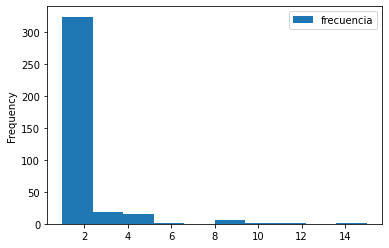

In [10]:
# Vamos a hacer el sesgo del salario en dólares
# Hacemos un histograma para ilustrarlo

salaries_usd = df.groupby('salary_in_usd')
salaries_freq = salaries_usd.agg(frecuencia = ('salary_in_usd', 'count'))
salaries_freq.plot.hist()

In [11]:
# Vemos que está sesgado hacia la derecha, comprobamos de forma numérica:

from scipy.stats import skew

skewness_usd = skew(df['salary_in_usd'])
skewness_usd

1.6634213360977623

In [12]:
# Es un valor positivo, por lo que está sesgado hacia la derecha.
# Esto queire decir que la mayoria tiene salarios en los rangos más bajos del conjunto de datos.

 * Intervalo de confianza de algunas de las variables numéricas del dataset


In [13]:
# Lo calculamos y lo comparamos con la media para la variable salary in usd

print(st.t.interval(alpha = 0.95, df = len(df['salary_in_usd'])-1, loc = np.mean(df['salary_in_usd']), scale= st.sem(df['salary_in_usd'])))
print(np.mean(df['salary_in_usd']))

(106641.74701149788, 117953.99269196176)
112297.86985172982



2. Interpretación de los resultados.

 * Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

##### `tabla de contingencia`

En la tabla de contingencia vemos qué rango de salario es más fercuente por cada categoría del sector data.

A simple vista, podemos apreciar que, en este conjunto de datos, los **puestos de trabajo más frecuentes** son los siguientes:
*  `data scientists`
*  `data engineers`, 
*  `data analysts` y 
*  `machine learning engineers`.

Y que su **rango de salario más frecuente** en todos los casos está entre `(80000, 160000]`

Mientras, los puestos de trabajo que más sobresalen en el rango de salario superior, `(200000, 320000] `, son:
* `data engineers` y
* `data scientists`

Seguidos con cierta distancia por los `data architects`.

Echando un vistazo a los extremos, vemos que
entre los **salarios más bajos** destacan algunos `data scientists` y `data analysts`.

Y que la persona que tiene el **salario máximo** en nuestro conjunto de datos es `principal data engineer`.

Es en el caso de los datos extremos que tendríamos que estudiar más los datos y las demás condiciones que puedan influir en ellos antes de extraer conclusiones.

##### `coeficiente de correlación`

Comparando las variables numéricas de `año` y `salario`, sale una **correlación negativa**. Eso quiere decir que con el tiempo los salarios desceinden un `0.08` con respecto a `1`, osea un `8%`.

Sin embargo, al ser un rango de años tan pequeño, no podemos extraer conclusiones firmes con respecto a la tendencia.

##### `sesgo`

El sesgo es un valor positivo, por lo que la mayoria de valores se van a encontrar en la mitad inferior del rango de salarios.

Eso quiere decir que **la mayoria de los encuestados tiene un salario en los rangos más bajos** de los que hay en el conjunto de datos.

##### `intervalo de confianza`

El intervalo de confianza `(106641.74701149788, 117953.99269196176)`
nos indica que los valores que estén `5656.12$` por encima y por debajo de la media, que es `112297.87$`, son los más probables, frecuentes y confiables en nuestro conjunto de datos.